# Imports and aux functions

In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import SimpleRNN
np.set_printoptions(threshold=np.inf)
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [3]:
def round_to_nearest(number, lower_limit, upper_limit):
    diff_lower = abs(number - lower_limit)
    diff_upper = abs(number - upper_limit)
    
    if diff_lower < diff_upper:
        return lower_limit
    else:
        return upper_limit

def mean_squared_difference(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")
    
    squared_differences = [(x - y) ** 2 for x, y in zip(list1, list2)]
    mean_squared_diff = sum(squared_differences) / len(list1)
    
    return mean_squared_diff

def accuracy(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Lists must have the same length")
    
    correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    total_predictions = len(true_labels)
    
    accuracy_value = correct_predictions / total_predictions
    return accuracy_value

def select_nth_elements(lists, n):
    selected_elements = [lst[n] for lst in lists]
    return selected_elements

def calculate_accuracy(predictions, values):
    sum=0
    for i in range(len(predictions)):
        if predictions[i][1]== values[i][1] and predictions[i][3] == values[i][3] and predictions[i][4] == values[i][4]:
            sum+=1
    
    accuracy=sum/len(predictions)
    return accuracy

# ANN to predict thickness of target

## Neural Network with 1 label

##### Data reshaping

Blue graph: Thick:743.6779054619601
Orange graph: Thick:708.2740771944319


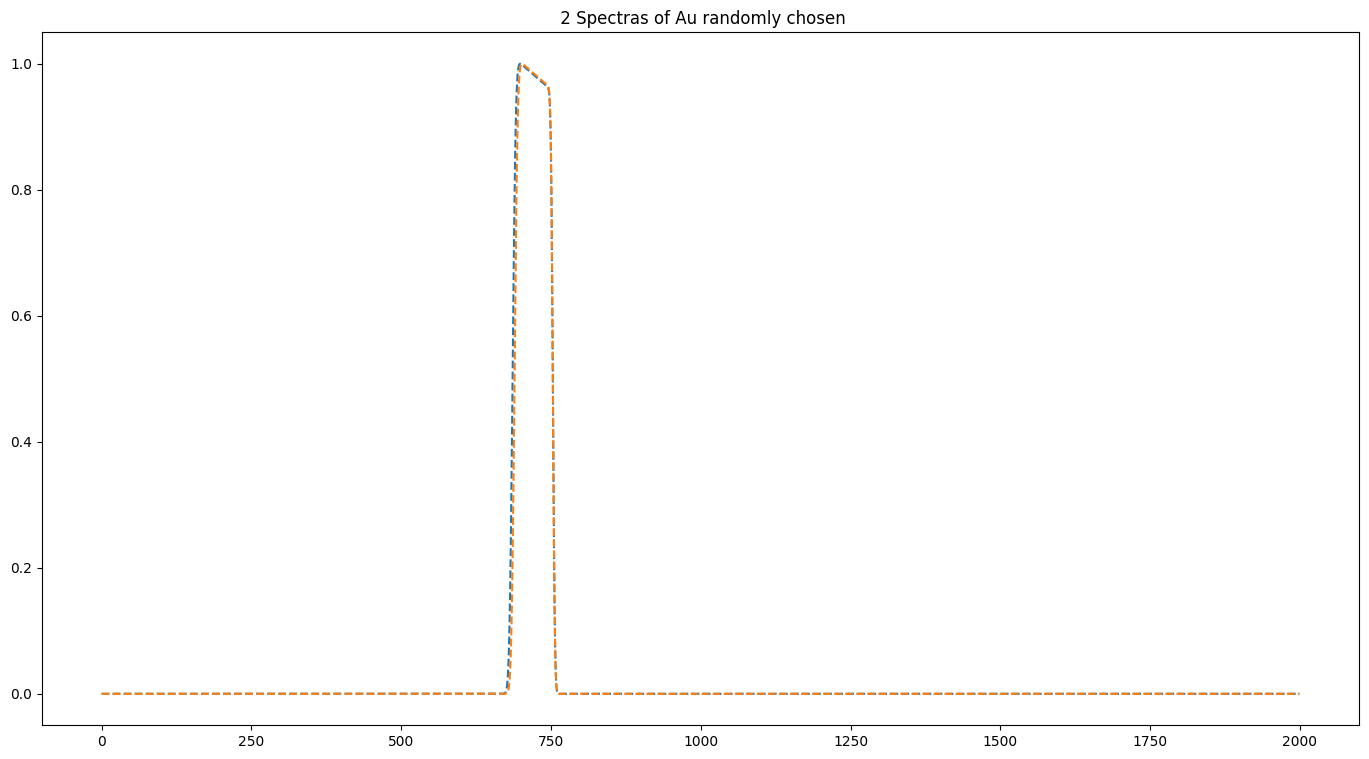

In [4]:
with open('data1.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels1.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(2000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(40,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):

    temp_thick.append(predictions[i][0] - y_test[i][0])


##### Graphs

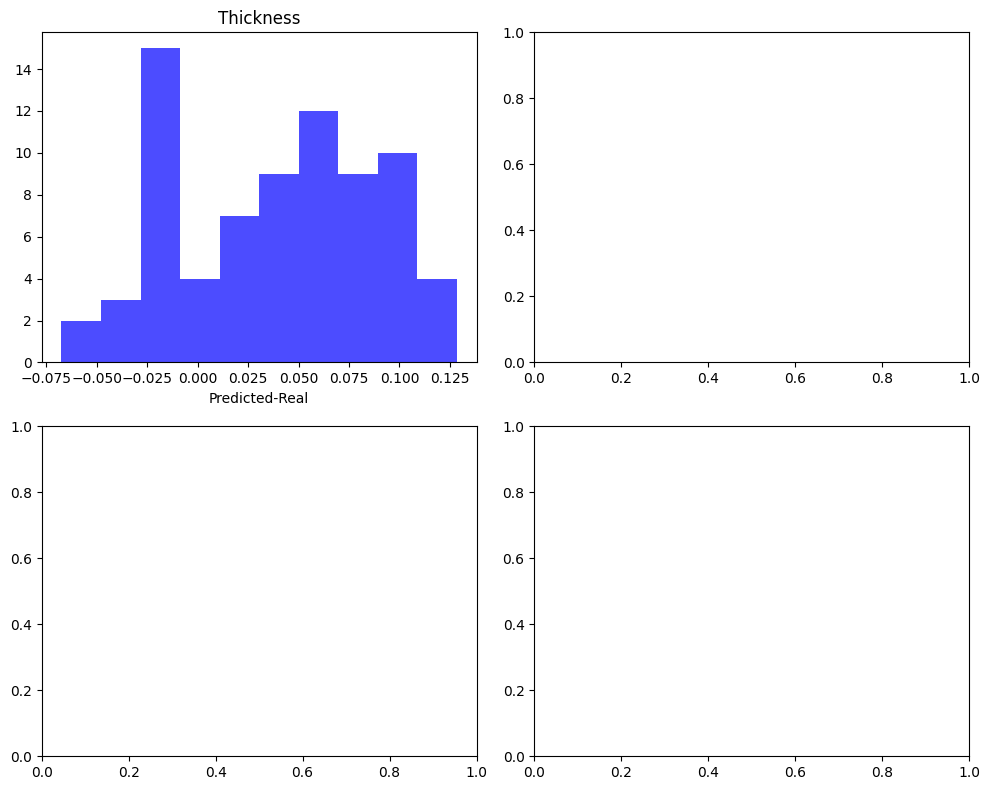

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=10, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [7]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print()
    print()

Target 1 :
Thickness: 
P: 696.0549. R: 696.0624096204552


Target 2 :
Thickness: 
P: 719.80835. R: 719.7425010229493


Target 3 :
Thickness: 
P: 733.8225. R: 733.7210867998959


Target 4 :
Thickness: 
P: 721.8438. R: 721.7532042116546


Target 5 :
Thickness: 
P: 731.2484. R: 731.1682684660997


Target 6 :
Thickness: 
P: 740.7488. R: 740.7190389557597


Target 7 :
Thickness: 
P: 691.5737. R: 691.5923461095641


Target 8 :
Thickness: 
P: 651.49084. R: 651.3624530170966


Target 9 :
Thickness: 
P: 692.29926. R: 692.3210425076145


Target 10 :
Thickness: 
P: 728.23926. R: 728.1628576366485


Target 11 :
Thickness: 
P: 679.34924. R: 679.3701429723649


Target 12 :
Thickness: 
P: 695.4424. R: 695.4553283698501


Target 13 :
Thickness: 
P: 686.23047. R: 686.2349198806462


Target 14 :
Thickness: 
P: 718.73663. R: 718.6798474681983


Target 15 :
Thickness: 
P: 684.479. R: 684.5025277160851


Target 16 :
Thickness: 
P: 735.77893. R: 735.681713043702


Target 17 :
Thickness: 
P: 682.6936. R: 682

##### Mean Squared Difference and Accuracy

In [8]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))

0.003920361889560648


## Neural Network with 2 Labels

##### Data reshaping

In [ ]:
with open('data2.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels2.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(2000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(2,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []


for i in range(len(predictions)):

    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])

##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))

## Neural Network with 3 Labels

##### Data reshaping

In [ ]:
with open('data3.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels3.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2]))
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(3,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []


for i in range(len(predictions)):

    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])

##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1,0].hist(temp_energy, bins=20, color='yellow',alpha=0.7)
axs[1,0].set_title('Energy')
axs[1,0].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))

## Neural Network with 4 Labels

##### Data reshaping

In [ ]:
with open('data4.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels4.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]


Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Data spliting

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(4,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140,165)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])
    temp_angle.append(predictions[i][3] - y_test[i][3])


##### Graphs

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1,0].hist(temp_energy, bins=20, color='yellow',alpha=0.7)
axs[1,0].set_title('Energy')
axs[1,0].set_xlabel('Predicted-Real')

axs[1, 1].hist(temp_angle, bins=5, color='red', alpha=0.7)
axs[1, 1].set_title('Angle')
axs[1, 1].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print('Angle: ')
    print('P: ' + str(predictions[i][3]) + '. R: ' + str(y_test[i][3]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))

## Neural Network with 5 Labels


##### Data reshaping

Blue graph: Thick:720.8390704295334 Particle: 1.0 Energy: 1815.0941590946957 Scatter angle: 140.0 Target: 0.0
Orange graph: Thick:676.327289060892 Particle: 0.0 Energy: 1973.5207800757626 Scatter angle: 140.0 Target: 0.0


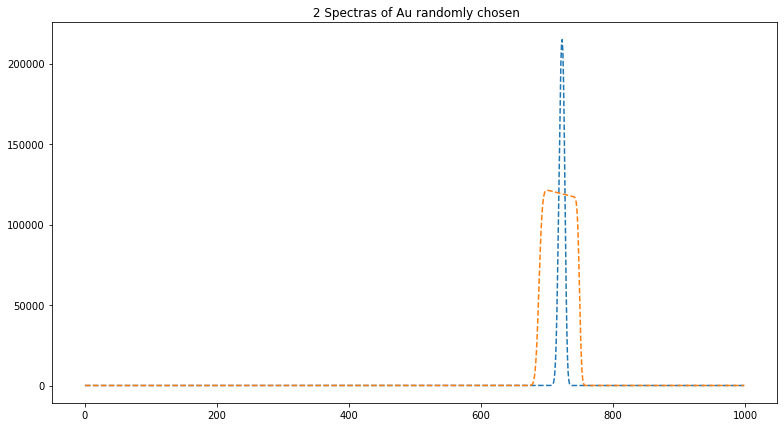

'\n#seperate regression from classification\ny_rgrss=[]\ny_clssfr=[]\nfor l in y:\n    aux=[]\n    aux.append(l[1])\n    aux.append(l[3])\n    aux.append(l[4])\n    y_clssfr.append(aux)\n    aux=[]\n    aux.append(l[0])\n    aux.append(l[2])\n    y_rgrss.append(aux)\n\n\n#numpy list\nY_rgrss=np.array(y_rgrss)\nY_clssfr=np.array(y_clssfr)\n'

In [3]:
#data reshaping
with open('data5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    


#labels reshaping
with open('labels5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)
del y[len(y)-1]


#normalize
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

#numpy list
X=np.array(Xx)
Y=np.array(y)


#spectra graph
a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(13, 7))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3])+' Target: '+str(Y[a][4]))
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3])+' Target: '+str(Y[b][4]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

'''
#seperate regression from classification
y_rgrss=[]
y_clssfr=[]
for l in y:
    aux=[]
    aux.append(l[1])
    aux.append(l[3])
    aux.append(l[4])
    y_clssfr.append(aux)
    aux=[]
    aux.append(l[0])
    aux.append(l[2])
    y_rgrss.append(aux)


#numpy list
Y_rgrss=np.array(y_rgrss)
Y_clssfr=np.array(y_clssfr)
'''

##### Data spliting

In [4]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)

##### Model training

In [5]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(5,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140,165)
    predictions[i][4]=round_to_nearest(predictions[i][4], 0,1)

    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])
    temp_angle.append(predictions[i][3] - y_test[i][3])
    temp_target.append(predictions[i][4] - y_test[i][4])

Epoch 1/150
238/238 [==============================] - 4s 4ms/step - loss: 5765843.5000 - mae: 842.1565
Epoch 2/150
238/238 [==============================] - 1s 4ms/step - loss: 91947.2812 - mae: 231.3245
Epoch 3/150
238/238 [==============================] - 1s 4ms/step - loss: 76900.6172 - mae: 212.6430
Epoch 4/150
238/238 [==============================] - 1s 4ms/step - loss: 81563.8984 - mae: 215.2798
Epoch 5/150
238/238 [==============================] - 1s 4ms/step - loss: 67009.8047 - mae: 199.4599
Epoch 6/150
238/238 [==============================] - 1s 4ms/step - loss: 53624.7422 - mae: 179.2384
Epoch 7/150
238/238 [==============================] - 1s 4ms/step - loss: 67781.3594 - mae: 195.1025
Epoch 8/150
238/238 [==============================] - 1s 4ms/step - loss: 70014.4688 - mae: 196.4334
Epoch 9/150
238/238 [==============================] - 1s 4ms/step - loss: 50341.5039 - mae: 172.5614
Epoch 10/150
238/238 [==============================] - 1s 5ms/step - loss: 4318

##### Graphs

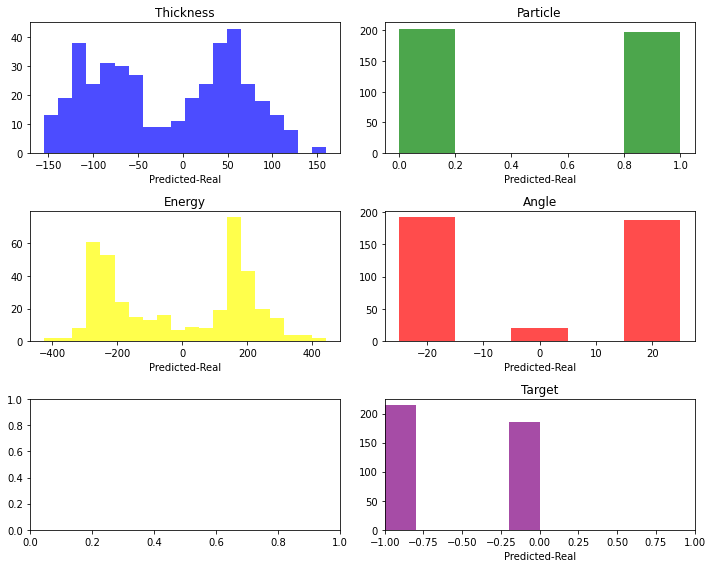

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=5, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1,0].hist(temp_energy, bins=20, color='yellow',alpha=0.7)
axs[1,0].set_title('Energy')
axs[1,0].set_xlabel('Predicted-Real')

axs[1, 1].hist(temp_angle, bins=5, color='red', alpha=0.7)
axs[1, 1].set_title('Angle')
axs[1, 1].set_xlabel('Predicted-Real')

axs[2, 1].hist(temp_target, bins=5, color='purple', alpha=0.7)
axs[2, 1].set_xlim(-1,1)
axs[2, 1].set_title('Target')
axs[2, 1].set_xlabel('Predicted-Real')


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plt.hist2d(temp_energy, temp_target)
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print('Angle: ')
    print('P: ' + str(predictions[i][3]) + '. R: ' + str(y_test[i][3]))
    print('Target: ')
    print('P: ' + str(predictions[i][4]) + '. R: ' + str(y_test[i][4]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))
print(accuracy(select_nth_elements(y_test, 4),select_nth_elements(predictions, 4)))
print(calculate_accuracy(predictions,y_test))

## RNN testing (5 labels)

##### Data reshaping

In [ ]:
#data reshaping
with open('data5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    


#labels reshaping
with open('labels5.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)
del y[len(y)-1]


#normalize
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

#numpy list
X=np.array(Xx)
Y=np.array(y)


#spectra graph
a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(13, 7))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3])+' Target: '+str(Y[a][4]))
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3])+' Target: '+str(Y[b][4]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

##### Model training

In [ ]:
random_state=np.random.randint(0,100)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=random_state)


original_shape = X_train.shape
X_trainreshape = X_train.reshape((original_shape[0], 1, original_shape[1]))
original_shape = X_test.shape
X_testreshape = X_test.reshape((original_shape[0], 1, original_shape[1]))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
model=keras.models.Sequential(
    [keras.layers.SimpleRNN(100,input_shape=(1,1000),return_sequences=True),
    keras.layers.Dense(80,activation= 'relu'),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(5,activation='linear')])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

plot_model(model, to_file='modelrnn.png', show_shapes=True)

epochs = 125
batch_size = 32
model.fit(X_trainreshape,y_train,epochs=epochs,batch_size=batch_size,verbose=1,callbacks=[callback])

loss, mae = model.evaluate(X_testreshape, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_testreshape)
predictions = predictions.reshape(len(y_test), 5)
temp_part, temp_thick, temp_angle, temp_target, temp_energy = [], [], [], [], []

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140, 165)
    predictions[i][4]=round_to_nearest(predictions[i][3], 0, 1)


    temp_thick.append(predictions[i][0] - y_test[i][0])
    temp_part.append(predictions[i][1] - y_test[i][1])
    temp_energy.append(predictions[i][2] - y_test[i][2])
    temp_angle.append(predictions[i][3] - y_test[i][3])
    temp_target.append(predictions[i][4] - y_test[i][4])

##### Graphs


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(temp_thick, bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness')
axs[0, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=30, color='green', alpha=0.7)
axs[0, 1].set_title('Particle')
axs[0, 1].set_xlabel('Predicted-Real')

axs[1, 0].hist(temp_angle, bins=30, color='red', alpha=0.7)
axs[1, 0].set_title('Angle')
axs[1, 0].set_xlabel('Predicted-Real')

axs[1, 1].hist(temp_target, bins=30, color='purple', alpha=0.7)
axs[1, 1].set_title('Target')
axs[1, 1].set_xlabel('Predicted-Real')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plt.hist2d(temp_energy, temp_angle)
plt.show()

##### Predictions vs Real values

In [ ]:
for i in range(len(predictions)):

    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('P: ' + str(predictions[i][0]) + '. R: ' + str(y_test[i][0]))
    print('Particle: ')
    print('P: ' + str(predictions[i][1]) + '. R: ' + str(y_test[i][1]))
    print('Energy: ')
    print('P: ' + str(predictions[i][2]) + '. R: ' + str(y_test[i][2]))
    print('Angle: ')
    print('P: ' + str(predictions[i][3]) + '. R: ' + str(y_test[i][3]))
    print('Target: ')
    print('P: ' + str(predictions[i][4]) + '. R: ' + str(y_test[i][4]))
    print()
    print()

##### Mean Squared Difference and Accuracy

In [ ]:
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))
print(accuracy(select_nth_elements(y_test, 4),select_nth_elements(predictions, 4)))
print(calculate_accuracy(predictions,y_test))

## Combined regression and classification (3 labels)

##### Data reshaping

Blue graph: Thick Layer1 : 1298.4582020293033// Thick Layer2 : 0// Target : Pb
Orange graph: Thick Layer1 : 932.9746570781508// Thick Layer2 : 0// Target : Au


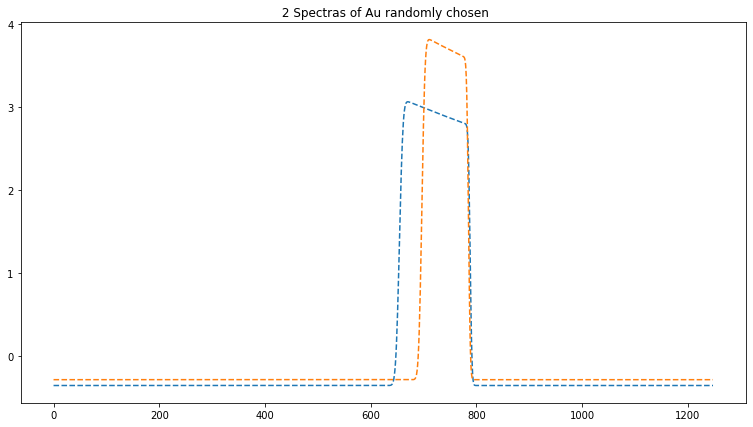

In [95]:
#data reshaping
with open('datatest.txt', 'r') as file:
    input_string = file.read()
lines1 = input_string.split('\n')

with open('labelstest.txt', 'r') as file:
    input_string = file.read()
lines2 = input_string.split('\n')

x = []
for line in lines1:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

y = []
for line in lines2:
    values = line.split()
    float_values = [value for value in values]
    y.append(float_values)
del y[len(y)-1]


#normalize
Xx=[]
for array in x:
    mean=np.mean(array)
    std=np.std(array)
    new_array=(array-mean)/std
    Xx.append(new_array)

#numpy list
X=np.array(Xx)
Y=np.array(y)


#spectra graph
a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(13, 7))
plt.plot(xaxis,X[a],'--')
plt.plot(xaxis,X[b],'--')
print('Blue graph: Thick Layer1 : '+str(Y[a][0])+ ' // Thick Layer2 : '+str(Y[a][1])+ ' // Target : '+str(Y[a][2]))
print('Orange graph: Thick Layer1 : '+str(Y[b][0])+ ' // Thick Layer2 : '+str(Y[b][1])+ ' // Target : '+str(Y[b][2]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

#seperate regression from classification
y_rgrss=[]
y_clssfr=[]
for l in y:
    aux=[]
    aux.append(l[2])
    y_clssfr.append(aux)
    aux=[]
    aux.append(l[0])
    aux.append(l[1])
    y_rgrss.append(aux)


#numpy list
Y_rgrss=np.array(y_rgrss)
Y_clssfr=np.array(y_clssfr)

##### Data splitting

In [111]:
random_state=np.random.randint(0,500)
X_train,X_test,y_train,y_test,y_trainclssfr,y_testclssfr=train_test_split(X,Y_rgrss,Y_clssfr,test_size=0.05,random_state=random_state)
encoder = OneHotEncoder(sparse_output=False)

print(y_test)
y_trainclssfr= encoder.fit_transform(y_trainclssfr.reshape(-1,1))
y_testclssfr= encoder.fit_transform(y_testclssfr.reshape(-1,1))
print(y_testclssfr)

[['2407.1699298493168' '0']
 ['1297.481156467256' '0']
 ['915.0358421293043' '0']
 ['937.6861443079886' '180.51952604123696']
 ['2275.5971950121666' '0']
 ['2172.830995952561' '0']
 ['1257.5578087559527' '0']
 ['861.4916643965202' '0']
 ['1604.2400062960046' '0']
 ['1011.2554441328315' '119.64988158245075']
 ['1026.0088665881535' '198.4872117338505']
 ['1250.681068582238' '0']
 ['1017.0089660069774' '101.0377711598234']
 ['928.556712944435' '142.74255422215197']
 ['1190.746676096535' '0']
 ['1390.0491471091475' '0']
 ['919.7877368660379' '0']
 ['972.6050456355638' '194.50337348940897']
 ['1421.3702554281895' '0']
 ['1440.7849653131752' '0']
 ['2391.788370048128' '0']
 ['863.0658378089836' '0']
 ['1228.1529763917126' '0']
 ['935.0954649523397' '0']
 ['1364.095252502536' '0']
 ['890.6823267269339' '0']
 ['907.991235771775' '0']
 ['1264.460091053068' '0']
 ['970.1673350545716' '128.7345056934997']
 ['1092.1217084667617' '156.87718388449247']
 ['907.9901643069264' '0']
 ['860.0718495857326

##### Model training

In [109]:
input_layer = keras.Input(shape=(1249,), name="input_layer")
dense_1 = keras.layers.Dense(100, activation = 'relu', name = 'dense_1')(input_layer)
dense_2 = keras.layers.Dense(80, activation = 'relu', name = 'dense_2')(dense_1)
dense_3 = keras.layers.Dense(80, activation = 'sigmoid', name = 'dense_3')(dense_2)
dense_4 = keras.layers.Dense(50, activation = 'relu', name = 'dense_4')(dense_3)
dense_5 = keras.layers.Dense(35, activation = 'relu', name = 'dense_5')(dense_4)
regression_output = keras.layers.Dense(2, activation = 'linear', name = 'regression_output')(dense_5)
classification_output = keras.layers.Dense(4, activation = 'softmax', name = 'classification_output')(dense_5)
model = keras.Model(inputs=input_layer,outputs=[regression_output, classification_output])
    

model.compile(
    loss=['mse','categorical_crossentropy'], optimizer='adam', metrics=['mae']
)


epochs = 85
batch_size = 64
#model.summary()
model.fit(X_train,
        {"regression_output": y_train, "classification_output": y_trainclssfr},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1)

#loss, mae = model.evaluate(X_test, y_testclssfr)
#print("Mean Absolute Error:", mae)
predictions1,predictions2=model.predict(X_test)
temp_part, temp_thick1, temp_thick2 = [], [], []


l=[0,1,2]

for i in range(len(predictions1)):
    aux=[]
    for j in l:
        aux.append((j-predictions2[i][0])**2)
    a= min(aux)
    for k in range(len(aux)):
        if a == aux[k]:
            predictions2[i][0]=k
            break
    if predictions1[i][1]<0:
        predictions1[i][1] = 0
    temp_thick1.append(predictions1[i][0] - y_test[i][0])
    temp_thick2.append(predictions1[i][1] - y_test[i][1])
    temp_part.append(np.argmax(predictions2[i]) - np.argmax(y_testclssfr[i]))

Epoch 1/85


UnimplementedError: Graph execution error:

Detected at node 'mean_squared_error/Cast' defined at (most recent call last):
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Bernardo\AppData\Local\Temp/ipykernel_1796/308018800.py", line 20, in <module>
      model.fit(X_train,
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Bernardo\anaconda3\envs\my-env\lib\site-packages\keras\src\losses.py", line 1607, in mean_squared_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_squared_error/Cast'
Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]] [Op:__inference_train_function_404145]

##### Graphs

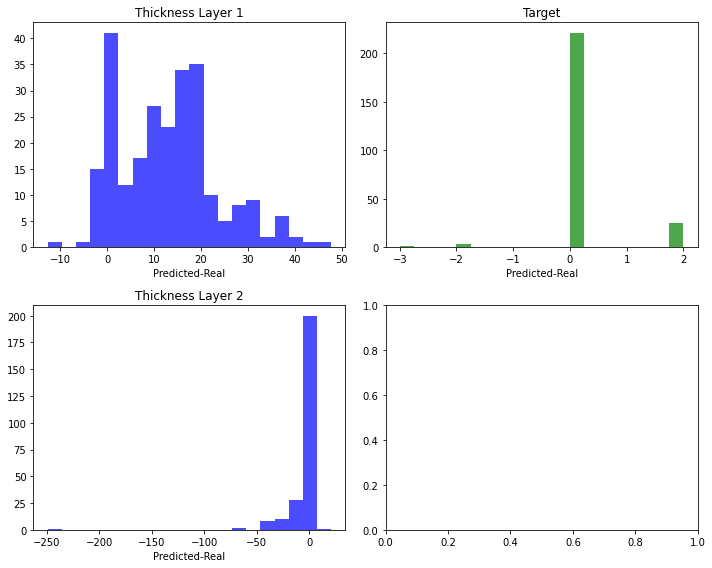

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(temp_thick1, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Thickness Layer 1')
axs[0, 0].set_xlabel('Predicted-Real')

axs[1, 0].hist(temp_thick2, bins=20, color='blue', alpha=0.7)
axs[1, 0].set_title('Thickness Layer 2')
axs[1, 0].set_xlabel('Predicted-Real')

axs[0, 1].hist(temp_part, bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('Target')
axs[0, 1].set_xlabel('Predicted-Real')



# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

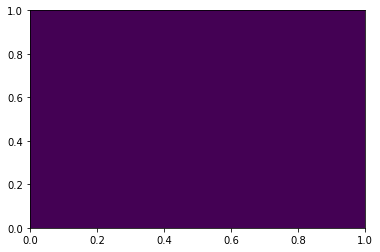

In [137]:
plt.hist2d(temp_energy, temp_angle)
plt.show()

##### Predictions vs Real values

In [88]:
for i in range(len(predictions1)):

    print('Target '+str(i+1)+' :')
    print('Thickness (Layer 1): ')
    print('P: ' + str(predictions1[i][0]) + '.\nR: ' + str(y_test[i][0]))
    print('Thickness (Layer 2): ')
    print('P: ' + str(predictions1[i][1]) + '.\nR: ' + str(y_test[i][1]))
    print('Target: ')
    print('P: ' + str(np.argmax(predictions2[i])) + '.\nR: ' + str(np.argmax(y_testclssfr[i])))
    print()
    print()

Target 1 :
Thickness (Layer 1): 
P: 1957.8586.
R: 1964.683766749826
Thickness (Layer 2): 
P: 0.0.
R: 0.0
Target: 
P: 3.
R: 3


Target 2 :
Thickness (Layer 1): 
P: 2565.0217.
R: 2563.8757097102275
Thickness (Layer 2): 
P: 0.0.
R: 0.0
Target: 
P: 3.
R: 3


Target 3 :
Thickness (Layer 1): 
P: 2890.9722.
R: 2886.878445221904
Thickness (Layer 2): 
P: 1.3129815.
R: 0.0
Target: 
P: 3.
R: 3


Target 4 :
Thickness (Layer 1): 
P: 945.36896.
R: 944.42468670492
Thickness (Layer 2): 
P: 168.80702.
R: 167.26536989628488
Target: 
P: 2.
R: 2


Target 5 :
Thickness (Layer 1): 
P: 1590.6033.
R: 1580.8203268850136
Thickness (Layer 2): 
P: 0.7132753.
R: 0.0
Target: 
P: 3.
R: 3


Target 6 :
Thickness (Layer 1): 
P: 3061.8394.
R: 3059.0970296274186
Thickness (Layer 2): 
P: 0.023837298.
R: 0.0
Target: 
P: 3.
R: 3


Target 7 :
Thickness (Layer 1): 
P: 911.439.
R: 910.866492661298
Thickness (Layer 2): 
P: 135.87103.
R: 134.93573203619567
Target: 
P: 2.
R: 2


Target 8 :
Thickness (Layer 1): 
P: 1204.636.
R: 12